In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
f = '/Users/a1/Desktop/算法实战/house_price_predict/'
os.chdir(f)

### 1 读取数据

In [3]:
#1)读取数据
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

In [4]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.shape

(1460, 80)

### 2 合并数据

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e9b32b0>,
      dtype=object)

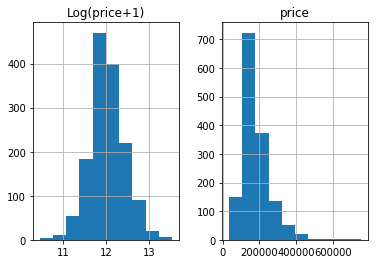

In [6]:
# 1) 取出SalePrice, label本身并不平滑，我们先让label平滑(正态化)，最后记得变回来expm1()
%matplotlib inline
prices = pd.DataFrame({"price":train_df["SalePrice"], "Log(price+1)":np.log1p(train_df["SalePrice"])})
prices.hist()

In [7]:
#把train中的y取出来,用pop
y_train = np.log1p(train_df.pop('SalePrice'))

In [8]:
# 2)把剩下的部分合起来
#pandas.concat:http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html#pandas.concat
all_df = pd.concat((train_df, test_df), axis=0)

In [10]:
all_df.shape

(2919, 79)

In [11]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

### 3 变量转化

    3.1正确化变量属性
    类似『特征工程』。就是把不方便处理或者不unify的数据给统一了。

    首先，我们注意到，*MSSubClass* 的值其实应该是一个category，
    但是Pandas是不会懂这些事儿的。使用DF的时候，这类数字符号会被默认记成数字。这种东西就很有误导性，我们需要把它变回成*string*

In [13]:
#首先，我们注意到，*MSSubClass* 的值其实应该是一个category，
#但是Pandas是不会懂这些事儿的。使用DF的时候，这类数字符号会被默认记成数字。这种东西就很有误导性，我们需要把它变回成*string*
#MSSubClass 本来应为属性，不是int值,查看值的属性
all_df['MSSubClass'].dtypes

dtype('int64')

In [14]:
#把int格式转换为str格式 -> 然后采用One-hot进行分类去除数字分类的影响
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)

In [15]:
#all_df['MSSubClass'].dtypes

In [16]:
#转换后，统计以下,value_counts()
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

    2 当用数字进行分类时候，数字大小会带来歧义，采用One-Hot方法
    当我们用numerical来表达categorical的时候，要注意，数字本身有大小的含义，所以乱用数字会给之后的模型学习带来麻烦。于是我们可以用One-Hot的方法来表达category。pandas自带的get_dummies方法，可以帮你一键做到One-Hot。

In [17]:
#当用数字进行分类时候，数字大小会带来歧义，采用One-Hot方法
#当我们用numerical来表达categorical的时候，要注意，数字本身有大小的含义，所以乱用数字会给之后的模型学习带来麻烦。于是我们可以用One-Hot的方法来表达category。pandas自带的get_dummies方法，可以帮你一键做到One-Hot。
#https://blog.csdn.net/lanchunhui/article/details/72870358, One-Hot
#此刻*MSSubClass*被我们分成了12个column，每一个代表一个category。是就是1，不是就是0。
pd.get_dummies(all_df['MSSubClass'], prefix='MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


     3 把所有的category数据，都给One-Hot

In [18]:
# 3 把所有的category数据，都给One-Hot
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


    4 处理好numerical变量，就算是numerical的变量，也还会有一些小问题。比如，有一些数据是缺失的：

In [18]:
# 4） 处理好numerical变量，就算是numerical的变量，也还会有一些小问题。比如，有一些数据是缺失的：
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
GarageCars         1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF2         1
dtype: int64

In [19]:
#### 处理这些缺失的信息，得靠好好审题。一般来说，数据集的描述里会写的很清楚，这些缺失都代表着什么。当然，如果实在没有的话，也只能靠自己的『想当然』。。在这里，我们用平均值来填满这些空缺。

In [21]:
#### 5） 处理这些缺失的信息，得靠好好审题。一般来说，数据集的描述里会写的很清楚，这些缺失都代表着什么。当然，如果实在没有的话，也只能靠自己的『想当然』。。在这里，我们用平均值来填满这些空缺。
mean_cols = all_dummy_df.mean()
mean_cols.head(20)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
TotalBsmtSF      1051.777587
1stFlrSF         1159.581706
2ndFlrSF          336.483727
LowQualFinSF        4.694416
GrLivArea        1500.759849
BsmtFullBath        0.429894
BsmtHalfBath        0.061364
FullBath            1.568003
HalfBath            0.380267
BedroomAbvGr        2.860226
dtype: float64

In [22]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [23]:
#填充完成后，看看有没有空缺值了
all_dummy_df.isnull().sum().sum()

0

    5 标准化数据， 这一步并不是必要，但是得看你想要用的分类器是什么。一般来说，regression的分类器都比较傲娇，最好是把源数据给放在一个标准分布内。不要让数据间的差距太大。

    这里，我们当然不需要把One-Hot的那些0/1数据给标准化。我们的目标应该是那些本来就是numerical的数据：

    先来看看 哪些是numerical的：

In [24]:
# 6）     5 标准化数据， 这一步并不是必要，但是得看你想要用的分类器是什么。一般来说，regression的分类器都比较傲娇，最好是把源数据给放在一个标准分布内。不要让数据间的差距太大。
#这一步并不是必要，但是得看你想要用的分类器是什么。一般来说，regression的分类器都比较傲娇，最好是把源数据给放在一个标准分布内。不要让数据间的差距太大。
#这里，我们当然不需要把One-Hot的那些0/1数据给标准化。我们的目标应该是那些本来就是numerical的数据：先来看看 哪些是numerical的：

In [24]:
numeric_cols = all_df.columns[all_df.dtypes != 'object'] #打印出所有数字列，就是不等于‘object’类型
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

    计算标准分布：(X-X')/s
    让我们的数据点更平滑，更便于计算。

    注意：我们这里也是可以继续使用Log的，我只是给大家展示一下多种“使数据平滑”的办法。

In [25]:
numeric_col_mean = all_dummy_df.loc[:, numeric_cols].mean() #取所有数字列的平均值
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std() #取所有数字列的方差
all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_mean)/numeric_col_std #每个数字减去均值，再除以方差
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202033,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.525112,0.580807,-0.29308,-0.934702,...,0,0,0,1,0,0,0,0,1,0
2,0.501785,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.572152,1.177910,-0.29308,-0.629788,...,0,0,0,1,0,0,0,0,1,0
3,-0.061269,0.137173,0.646073,-0.507197,0.980053,0.848819,0.334770,0.097856,-0.29308,-0.288467,...,0,0,0,1,0,0,0,0,1,0
4,-0.436639,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.572152,-0.494856,-0.29308,-0.047266,...,0,0,0,1,1,0,0,0,0,0
5,0.689469,0.518814,1.355319,-0.507197,0.947040,0.753100,1.387248,0.468851,-0.29308,-0.161040,...,0,0,0,1,0,0,0,0,1,0


### 4 建立模型

    1, 把数据集分为 训练/测试集

In [26]:
#1 把数据集分为 训练/测试集
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [27]:
print(dummy_train_df.shape)
print(dummy_test_df.shape)

(1460, 303)
(1459, 303)


    2, Ridge Regression 调用模型跑一波`
    用Ridge Regression模型来跑一遍看看。（对于多因子的数据集，这种模型可以方便的把所有的var都无脑的放进去）

### Ridge

In [28]:
# Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [31]:
#这一步不是很有必要，把DF转换为Numpy, 配合sklearn
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [32]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html
#用sklearn自带的cross validation方法测试
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

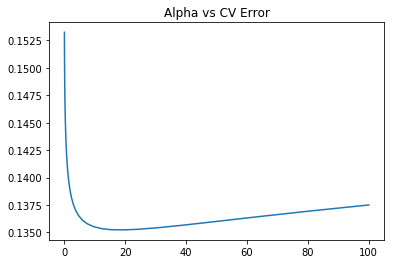

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");

可见，大概alpha=10~20的时候，可以把score达到0.135左右。

### Random Forest

In [34]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [37]:
max_features = [.1, .3, .5, .7, .9, .99]
text_scores=[]
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

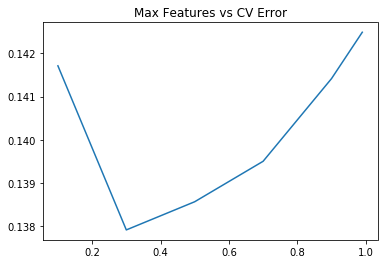

In [42]:
plt.plot(max_features, test_scores[0:6])
plt.title("Max Features vs CV Error");

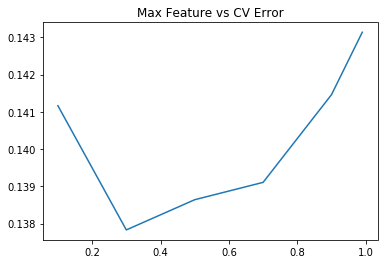

In [45]:
#注意这里有一个报错
#ValueError: x and y must have same first dimension, but have shapes (6,) and (12,)
#plt.plot(max_features, test_scores[6:12])
#plt.title("Max Feature vs CV Error");

用RF的最优值达到了0.137

### 5 Ensemble

    #这里我们用一个Stacking的思维来汲取两种或者多种模型的优点
    #首先，我们把最好的parameter拿出来，做成我们最终的model

In [49]:
#把刚才的模型最好的参数，代入，新建最好的模型是什么
ridge = Ridge(alpha=15)
rf = RandomForestRegressor(n_estimators=500, max_features=.3)

In [50]:
ridge.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

    #上面提到了，因为最前面我们给label做了个log(1+x), 于是这里我们需要把predit的值给exp回去，并且减掉那个"1"

    #所以就是我们的expm1()函数。

In [51]:
#这个时候才开始用X_test用来最后使用
y_ridge = np.expm1(ridge.predict(X_test))
y_rf = np.expm1(rf.predict(X_test))

In [52]:
#一个正经的Ensemble是把这群model的预测结果作为新的input，再做一次预测。这里我们简单的方法，就是直接『平均化』。

In [53]:
y_final = (y_ridge + y_rf)/2

In [55]:
X_test.shape # 看一下这个test的结构，因为知道test，最终都是药预测房屋价格的

(1459, 303)

### 6 提交结果

In [57]:
data = pd.DataFrame({'Id': test_df.index, 'SalePrice':y_final})

In [58]:
data.head()

,Id,SalePrice
0,1461,118707.103231
1,1462,151012.315572
2,1463,175031.366716
3,1464,189516.869574
4,1465,195426.180087


In [61]:
##另一种写法
#pd.DataFrame(data = {'ID': test_df.index, 'SalePrice':y_final}).head()